In [1]:
import torch 

In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02)
y = weight * X + bias

X[:10], y[:10]

X = X.view(-1, 1)  # Shape: (50, 1)
y = y.view(-1, 1)  # Shape: (50, 1)

In [3]:
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:],y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
import matplotlib.pyplot as plt

def plot(train_data=X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c= 'b', s=4, label = 'training data')

  plt.scatter(test_data, test_labels, c= 'g', s=4, label = 'testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label = 'prediction')


  plt.legend(prop={"size": 14});


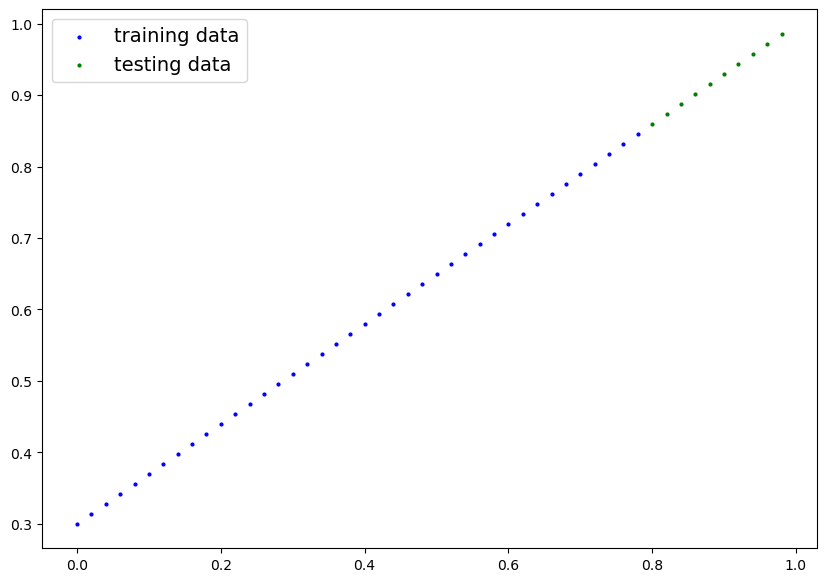

In [5]:
plot(X_train,y_train,X_test,y_test)

In [6]:
from torch import nn

# creating a linear model by subclassing nn.Module

class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1, out_features = 1) #applies linear regression formula, it also initializes the parameters

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelv2()
model_1, model_1.state_dict()


(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [7]:
next(model_1.parameters()).device

device(type='cpu')

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [10]:
# setup a loss function
loss_fn = nn.L1Loss()

#setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [11]:
# lets write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device(moving the data to gpu)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_1.train()


   # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # printing out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5739762187004089 
Epoch: 10 | MAE Train Loss: 0.4399680495262146 | MAE Test Loss: 0.4392663538455963 
Epoch: 20 | MAE Train Loss: 0.3247582018375397 | MAE Test Loss: 0.30455657839775085 
Epoch: 30 | MAE Train Loss: 0.20954827964305878 | MAE Test Loss: 0.16984674334526062 
Epoch: 40 | MAE Train Loss: 0.09433844685554504 | MAE Test Loss: 0.03513689711689949 
Epoch: 50 | MAE Train Loss: 0.023886386305093765 | MAE Test Loss: 0.04784906655550003 
Epoch: 60 | MAE Train Loss: 0.0199567973613739 | MAE Test Loss: 0.04580312222242355 
Epoch: 70 | MAE Train Loss: 0.016517987474799156 | MAE Test Loss: 0.0375305712223053 
Epoch: 80 | MAE Train Loss: 0.013089170679450035 | MAE Test Loss: 0.029944902285933495 
Epoch: 90 | MAE Train Loss: 0.009653178043663502 | MAE Test Loss: 0.02167237363755703 
Epoch: 100 | MAE Train Loss: 0.006215679459273815 | MAE Test Loss: 0.014086711220443249 
Epoch: 110 | MAE Train Loss: 0.002787243574857712 | MA

In [12]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [13]:
weight, bias

(0.7, 0.3)

In [14]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

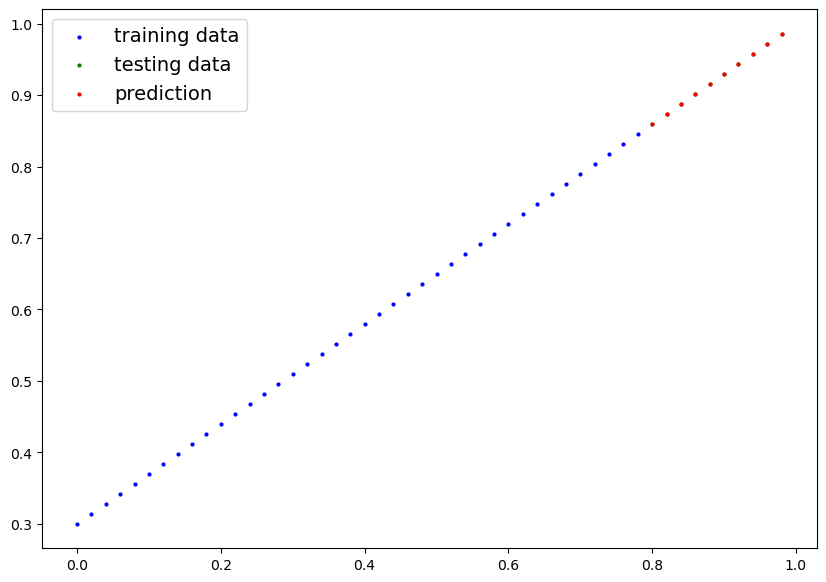

In [15]:
plot(predictions=y_preds.cpu())

In [16]:
from pathlib import Path

# 1. Create models directory

Models_Path = Path("models")
Models_Path.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
Model_name = "01_pytorch_workflow_model.pth"
Model_save_path = Models_Path / Model_name

Model_save_path

# 3. Save the model state dict
print(f"Saving model to: {Model_save_path}")
torch.save(obj = model_1.state_dict(), f = Model_save_path)

Saving model to: models\01_pytorch_workflow_model.pth


In [17]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [18]:
# create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelv2()

# load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(f = Model_save_path))

# put the loaded model to device
loaded_model_1.to(device)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8012\1011260236.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f = Model_save_path

LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [19]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [20]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [21]:
# evaluate the loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_1(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])